# Harmonic Constraint as Present Law

Here we test a bound quantum system that sits in a stable attractor. We evolve the ground state of the harmonic oscillator, sample detector clicks, and confirm that the distributions match the stationary $|\psi|^2$. This illustrates the thesis that laws are present constraints holding a system together: the oscillator’s potential and the measurement form a holistic apparatus whose statistics must cohere right now.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from wavefunction_now.solver import SplitStepSimulator
from wavefunction_now.measurement import (
    born_probability,
    chi_squared_gof,
    ks_goodness_of_fit,
    sample_measurements,
)

In [2]:
sim = SplitStepSimulator(grid_points=1024, length=40.0)
omega = 0.2
mass = sim.mass

# Harmonic potential V(x) = 0.5 * m * omega^2 * x^2
potential = 0.5 * mass * omega**2 * sim.x**2

# Ground-state width for the chosen units (hbar = 1).
sigma = np.sqrt(1.0 / (2.0 * mass * omega))
psi0 = sim.gaussian_wavepacket(sim.x, x0=0.0, p0=0.0, sigma=sigma)

# Propagate to allow the split-step solver to settle numerically.
psi_t = sim.evolve(psi0, potential=potential, dt=0.01, steps=800)
prob_density = born_probability(psi_t)

In [3]:
bin_edges = np.linspace(-10.0, 10.0, 161)
bin_centres = 0.5 * (bin_edges[:-1] + bin_edges[1:])
expected_prob = sim.bin_probabilities(psi_t, bin_edges)

rng = np.random.default_rng(303)
samples = sample_measurements(expected_prob, size=50000, rng=rng)
counts = np.bincount(samples, minlength=expected_prob.size)

chi2_stat, chi2_p = chi_squared_gof(expected_prob, counts)
ks_stat, ks_p = ks_goodness_of_fit(expected_prob, samples)

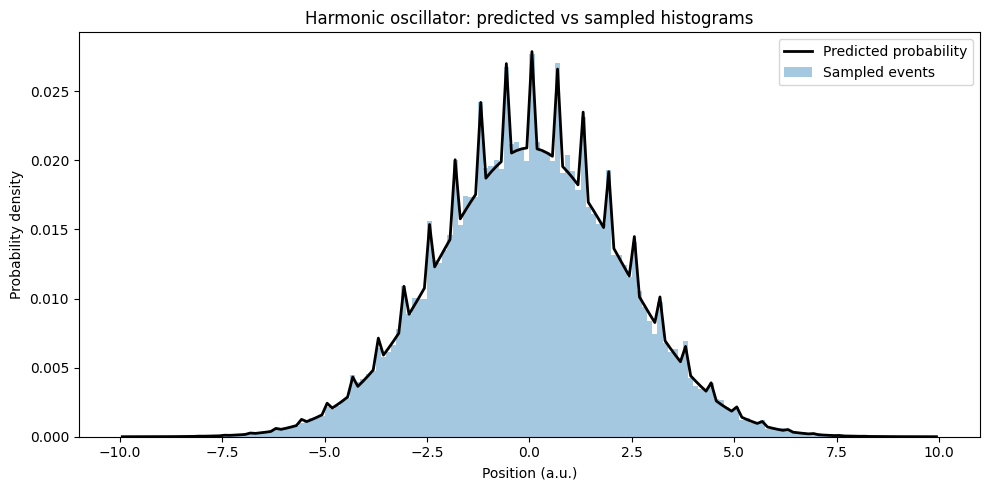

Chi-squared statistic: 106.518, p-value: 1.000
KS statistic: 0.003, p-value: 0.429


In [4]:
plt.figure(figsize=(10, 5))
plt.bar(bin_centres, counts / counts.sum(), width=np.diff(bin_edges), alpha=0.4, label='Sampled events')
plt.plot(bin_centres, expected_prob, color='black', linewidth=2, label='Predicted probability')
plt.xlabel('Position (a.u.)')
plt.ylabel('Probability density')
plt.title('Harmonic oscillator: predicted vs sampled histograms')
plt.legend()
plt.tight_layout()
plt.show()

print(f'Chi-squared statistic: {chi2_stat:.3f}, p-value: {chi2_p:.3f}')
print(f'KS statistic: {ks_stat:.3f}, p-value: {ks_p:.3f}')

A high p-value in both tests confirms the static potential shares the same correlation structure as the Monte Carlo detector events.